<hr style="border:2px solid gray"> </hr>
<img src="https://mma.prnewswire.com/media/1095203/East_Tennessee_State_University_Logo.jpg?p=facebook" width=200 height=200 />

<div class="alert alert-block alert-info">
    <h1 style="text-align: center">CSCI 5037 - NLP & Text Analysis</h1>
</div>

# <center>Lab 1 - Text Representation </center>

**<center>Dr. Ahmad Al-Doulat </center>**
<center>Department of Computing </center>
<center>East Tennessee State University</center>

<hr style="border:2px solid lightblue"> </hr>

**In this assignment, you'll get to practice the concepts and skills covered in the first module (Module 1). The main objective of this assignment is to implement and use some of the tools, algorithms, and techniques that were described in the theory portion of the lecture..**



**Guidelines**
* Download `ShakespeareSonnets.txt` file from D2L. 
* Make sure to run all the code cells, otherwise you may get errors like `NameError` for undefined variables.
* Do not change variable names, delete cells or disturb other existing code. It may cause problems during evaluation.
* In some cases, you may need to add some code cells or new statements before or after the line of code containing the `???`.
* Use markdown cells to write your discussions and reflections. 

**Procedure**
* Save your work as `IPYNB` file and submit to D2L `Lab 1 - Text Representation (Dropbox)` by the due date.
* As you go through this notebook, you will find the symbol `???` in certain places. To complete this assignment, you must replace all the `???` with appropriate values, expressions or statements to ensure that the notebook runs properly end-to-end.
* Include your response for `Part 1` and `Part 2` in this notebook. 

<div class="alert alert-block alert-info">

# Part 1: Activity 

</div>

# Question 1: Reading the dataset 
<hr style="border:1px solid orange"> </hr>

#### Read the content of the `ShakespeareSonnets.txt` into a sting called `sonnets` and perform the following: 

> **Q1.1.** Tokenize the text into individual words or individual tokens and store the result into a variable called `text_tokens`. Make sure to ignore the punctuation characters. Then print the results.

> **Q1.2.** Tokenize the text into individual sentences. Then print the results.

> **Q1.3.**  Encode `text_tokens` using One-Hot Encoding approach and store the encoded tokens into a Dataframe called `one_hot_df`.

> **Q1.4.** Represent the `one_hot_df` using a Bag of words  

> **Q1.5.** Remove the stopwords from the `sonnets` variable and store the results in a variable called `filtered_sonnets`

> **Q1.6.** Create a list called `sonnets_corpus` by splitting the `sonnets` variable into individual sonnets (The result should be 144 sonnets). Then, perform a `TF/IDF` on the resulted list to get the TF/IDF score for all tokens in the corpus. Make sure to remove the punctuation characters.  

> **Q1.7.** Using `nltk.util`'s ngrams module, find the 4-grams of the `sonnets`variable.

In [1]:
!pip3 install watermark

In [2]:
import warnings 
warnings.filterwarnings ('ignore')

import os 
import gzip 
from collections import Counter 
from pprint import pprint

import pandas as pd 
import numpy as np

import matplotlib 
import matplotlib.pyplot as plt

np.random.seed(123)

import string 
import nltk 
from nltk.corpus import stopwords 
from nltk.text import TextCollection 
from nltk.collocations import BigramCollocationFinder 
from nltk.metrics.association import BigramAssocMeasures

import sklearn 
from sklearn.manifold import TSNE 
from sklearn.metrics.pairwise import cosine_similarity

from tqdm import tqdm 
tqdm.pandas()

import watermark

%load_ext watermark 
%matplotlib inline

In [3]:
%watermark 

Last updated: 2024-09-08T20:42:19.174832-04:00

Python implementation: CPython
Python version       : 3.12.5
IPython version      : 8.26.0

Compiler    : MSC v.1940 64 bit (AMD64)
OS          : Windows
Release     : 11
Machine     : AMD64
Processor   : Intel64 Family 6 Model 170 Stepping 4, GenuineIntel
CPU cores   : 14
Architecture: 64bit



**Reading the content of the text file:**

In [4]:
with open('ShakespeareSonnets.txt', 'r', encoding='utf-8') as file:
    sonnets = file.read()

In [5]:
# Print first 500 characters
print(sonnets[:500])

Sonnets
by William Shakespeare
Edited by Barbara A. Mowat and Paul Werstine
  with Michael Poston and Rebecca Niles
Folger Shakespeare Library
https://shakespeare.folger.edu/shakespeares-works/shakespeares-sonnets/
Created on Jul 31, 2015, from FDT version 0.9.0.1




1

From fairest creatures we desire increase,
That thereby beauty's rose might never die,
But, as the riper should by time decease,
His tender heir might bear his memory.
But thou, contracted to thine own bright eyes,
Feed'st thy l


**Q1.1. Tokenize the text into individual words or individual tokens and store the result into a variable called text_tokens. Make sure to ignore the punctuation characters. Then print the results.**

In [6]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\MAHARJANA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [7]:
def tokenize(text, preserve_case = True):
    punctuation = set(string.punctuation) 
    text_words = []
    
    for word in nltk.tokenize.WordPunctTokenizer().tokenize(text):
        # Remove any token that corresponds to a punctuation character 
        if word in punctuation:
            continue
        
        # Are we keeping the original letter case or 
        # Using lowercase throughout? 
        if preserve_case:
            text_words.append(word) 
        else:
            text_words.append(word.lower())
    return text_words

In [8]:
text_tokens = tokenize(sonnets, False)

In [9]:
pprint(text_tokens)

['sonnets',
 'by',
 'william',
 'shakespeare',
 'edited',
 'by',
 'barbara',
 'a',
 'mowat',
 'and',
 'paul',
 'werstine',
 'with',
 'michael',
 'poston',
 'and',
 'rebecca',
 'niles',
 'folger',
 'shakespeare',
 'library',
 'https',
 '://',
 'shakespeare',
 'folger',
 'edu',
 'shakespeares',
 'works',
 'shakespeares',
 'sonnets',
 'created',
 'on',
 'jul',
 '31',
 '2015',
 'from',
 'fdt',
 'version',
 '0',
 '9',
 '0',
 '1',
 '1',
 'from',
 'fairest',
 'creatures',
 'we',
 'desire',
 'increase',
 'that',
 'thereby',
 'beauty',
 's',
 'rose',
 'might',
 'never',
 'die',
 'but',
 'as',
 'the',
 'riper',
 'should',
 'by',
 'time',
 'decease',
 'his',
 'tender',
 'heir',
 'might',
 'bear',
 'his',
 'memory',
 'but',
 'thou',
 'contracted',
 'to',
 'thine',
 'own',
 'bright',
 'eyes',
 'feed',
 'st',
 'thy',
 'light',
 's',
 'flame',
 'with',
 'self',
 'substantial',
 'fuel',
 'making',
 'a',
 'famine',
 'where',
 'abundance',
 'lies',
 'thyself',
 'thy',
 'foe',
 'to',
 'thy',
 'sweet',
 '

**Q1.2. Tokenize the text into individual sentences. Then print the results.**

In [10]:
sentences = nltk.sent_tokenize(sonnets,'english')

In [11]:
len(sentences)

675

In [12]:
print(sentences[0])

Sonnets
by William Shakespeare
Edited by Barbara A. Mowat and Paul Werstine
  with Michael Poston and Rebecca Niles
Folger Shakespeare Library
https://shakespeare.folger.edu/shakespeares-works/shakespeares-sonnets/
Created on Jul 31, 2015, from FDT version 0.9.0.1




1

From fairest creatures we desire increase,
That thereby beauty's rose might never die,
But, as the riper should by time decease,
His tender heir might bear his memory.


In [13]:
pprint(sentences)

['Sonnets\n'
 'by William Shakespeare\n'
 'Edited by Barbara A. Mowat and Paul Werstine\n'
 '  with Michael Poston and Rebecca Niles\n'
 'Folger Shakespeare Library\n'
 'https://shakespeare.folger.edu/shakespeares-works/shakespeares-sonnets/\n'
 'Created on Jul 31, 2015, from FDT version 0.9.0.1\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '1\n'
 '\n'
 'From fairest creatures we desire increase,\n'
 "That thereby beauty's rose might never die,\n"
 'But, as the riper should by time decease,\n'
 'His tender heir might bear his memory.',
 'But thou, contracted to thine own bright eyes,\n'
 "Feed'st thy light's flame with self-substantial fuel,\n"
 'Making a famine where abundance lies,\n'
 'Thyself thy foe, to thy sweet self too cruel.',
 "Thou that art now the world's fresh ornament\n"
 'And only herald to the gaudy spring\n'
 'Within thine own bud buriest thy content\n'
 "And, tender churl, mak'st waste in niggarding.",
 'Pity the world, or else this glutton be--\n'
 "  To eat the world's due, by the gr

In [14]:
print(sentences)

["Sonnets\nby William Shakespeare\nEdited by Barbara A. Mowat and Paul Werstine\n  with Michael Poston and Rebecca Niles\nFolger Shakespeare Library\nhttps://shakespeare.folger.edu/shakespeares-works/shakespeares-sonnets/\nCreated on Jul 31, 2015, from FDT version 0.9.0.1\n\n\n\n\n1\n\nFrom fairest creatures we desire increase,\nThat thereby beauty's rose might never die,\nBut, as the riper should by time decease,\nHis tender heir might bear his memory.", "But thou, contracted to thine own bright eyes,\nFeed'st thy light's flame with self-substantial fuel,\nMaking a famine where abundance lies,\nThyself thy foe, to thy sweet self too cruel.", "Thou that art now the world's fresh ornament\nAnd only herald to the gaudy spring\nWithin thine own bud buriest thy content\nAnd, tender churl, mak'st waste in niggarding.", "Pity the world, or else this glutton be--\n  To eat the world's due, by the grave and thee.", "2\n\nWhen forty winters shall besiege thy brow\nAnd dig deep trenches in thy b

**Q1.3. Encode text_tokens using One-Hot Encoding approach and store the encoded tokens into a Dataframe called one_hot_df.**

In [15]:
one_hot_df = pd.get_dummies(text_tokens)

In [16]:
one_hot_df

,"""'","""?",",""",--,".""",0,1,10,100,101,...,yore,you,young,youngly,your,yours,yourself,youth,youthful,zealous
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18379,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18380,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18381,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18382,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**Q1.4. Represent the one_hot_df using a Bag of words**

In [17]:
pd.DataFrame(one_hot_df.sum(), columns=['Count'])

,Count
"""'",1
"""?",1
",""",7
--,10
".""",8
...,...
yours,5
yourself,10
youth,17
youthful,2


**Q1.5. Remove the stopwords from the sonnets variable and store the results in a variable called filtered_sonnets**

In [18]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MAHARJANA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
stop_words = set(stopwords.words('english'))
tokens = tokenize(sonnets) 
filtered_sonnets = [word if word.lower() not in stop_words else "" for word in tokens] 
pd.DataFrame((zip(tokens, filtered_sonnets)), columns=['Original', 'Filtered']).set_index( 'Original')

,Filtered
Original,
Sonnets,Sonnets
by,
William,William
Shakespeare,Shakespeare
Edited,Edited
...,...
one,one
out,
sig,sig


**Q1.6. Create a list called sonnets_corpus by splitting the sonnets variable into individual sonnets (The result should be 144 sonnets). Then, perform a TF/IDF on the resulted list to get the TF/IDF score for all tokens in the corpus. Make sure to remove the punctuation characters.**

In [20]:
# Splitting the sonnets with <New Line><Optional [><Number><Optional ]><New Line>
import re
sonnets_corpus = re.split(r'\n\[?\d+\]?\n', sonnets)

In [21]:
len(sonnets_corpus)

157

In [22]:
i=1
for doc in sonnets_corpus:
    print ('\n\n\n');
    print(i);
    print(doc);
    i=i+1;





1
Sonnets
by William Shakespeare
Edited by Barbara A. Mowat and Paul Werstine
  with Michael Poston and Rebecca Niles
Folger Shakespeare Library
https://shakespeare.folger.edu/shakespeares-works/shakespeares-sonnets/
Created on Jul 31, 2015, from FDT version 0.9.0.1








2

From fairest creatures we desire increase,
That thereby beauty's rose might never die,
But, as the riper should by time decease,
His tender heir might bear his memory.
But thou, contracted to thine own bright eyes,
Feed'st thy light's flame with self-substantial fuel,
Making a famine where abundance lies,
Thyself thy foe, to thy sweet self too cruel.
Thou that art now the world's fresh ornament
And only herald to the gaudy spring
Within thine own bud buriest thy content
And, tender churl, mak'st waste in niggarding.
  Pity the world, or else this glutton be--
  To eat the world's due, by the grave and thee.





3

When forty winters shall besiege thy brow
And dig deep trenches in thy beauty's field,
Thy yout

In [23]:
sonnets_corpus

['Sonnets\nby William Shakespeare\nEdited by Barbara A. Mowat and Paul Werstine\n  with Michael Poston and Rebecca Niles\nFolger Shakespeare Library\nhttps://shakespeare.folger.edu/shakespeares-works/shakespeares-sonnets/\nCreated on Jul 31, 2015, from FDT version 0.9.0.1\n\n\n\n',
 "\nFrom fairest creatures we desire increase,\nThat thereby beauty's rose might never die,\nBut, as the riper should by time decease,\nHis tender heir might bear his memory.\nBut thou, contracted to thine own bright eyes,\nFeed'st thy light's flame with self-substantial fuel,\nMaking a famine where abundance lies,\nThyself thy foe, to thy sweet self too cruel.\nThou that art now the world's fresh ornament\nAnd only herald to the gaudy spring\nWithin thine own bud buriest thy content\nAnd, tender churl, mak'st waste in niggarding.\n  Pity the world, or else this glutton be--\n  To eat the world's due, by the grave and thee.\n",
 '\nWhen forty winters shall besiege thy brow\nAnd dig deep trenches in thy beaut

In [24]:
sonnets_corpus = [tokenize(doc, preserve_case=False) for doc in sonnets_corpus]

In [25]:
pprint(sonnets_corpus)

[['sonnets',
  'by',
  'william',
  'shakespeare',
  'edited',
  'by',
  'barbara',
  'a',
  'mowat',
  'and',
  'paul',
  'werstine',
  'with',
  'michael',
  'poston',
  'and',
  'rebecca',
  'niles',
  'folger',
  'shakespeare',
  'library',
  'https',
  '://',
  'shakespeare',
  'folger',
  'edu',
  'shakespeares',
  'works',
  'shakespeares',
  'sonnets',
  'created',
  'on',
  'jul',
  '31',
  '2015',
  'from',
  'fdt',
  'version',
  '0',
  '9',
  '0',
  '1'],
 ['from',
  'fairest',
  'creatures',
  'we',
  'desire',
  'increase',
  'that',
  'thereby',
  'beauty',
  's',
  'rose',
  'might',
  'never',
  'die',
  'but',
  'as',
  'the',
  'riper',
  'should',
  'by',
  'time',
  'decease',
  'his',
  'tender',
  'heir',
  'might',
  'bear',
  'his',
  'memory',
  'but',
  'thou',
  'contracted',
  'to',
  'thine',
  'own',
  'bright',
  'eyes',
  'feed',
  'st',
  'thy',
  'light',
  's',
  'flame',
  'with',
  'self',
  'substantial',
  'fuel',
  'making',
  'a',
  'famine',
 

In [26]:
print(sonnets_corpus)

[['sonnets', 'by', 'william', 'shakespeare', 'edited', 'by', 'barbara', 'a', 'mowat', 'and', 'paul', 'werstine', 'with', 'michael', 'poston', 'and', 'rebecca', 'niles', 'folger', 'shakespeare', 'library', 'https', '://', 'shakespeare', 'folger', 'edu', 'shakespeares', 'works', 'shakespeares', 'sonnets', 'created', 'on', 'jul', '31', '2015', 'from', 'fdt', 'version', '0', '9', '0', '1'], ['from', 'fairest', 'creatures', 'we', 'desire', 'increase', 'that', 'thereby', 'beauty', 's', 'rose', 'might', 'never', 'die', 'but', 'as', 'the', 'riper', 'should', 'by', 'time', 'decease', 'his', 'tender', 'heir', 'might', 'bear', 'his', 'memory', 'but', 'thou', 'contracted', 'to', 'thine', 'own', 'bright', 'eyes', 'feed', 'st', 'thy', 'light', 's', 'flame', 'with', 'self', 'substantial', 'fuel', 'making', 'a', 'famine', 'where', 'abundance', 'lies', 'thyself', 'thy', 'foe', 'to', 'thy', 'sweet', 'self', 'too', 'cruel', 'thou', 'that', 'art', 'now', 'the', 'world', 's', 'fresh', 'ornament', 'and', 'o

In [27]:
nlp = TextCollection(sonnets_corpus)

<Axes: xlabel='Samples', ylabel='Counts'>

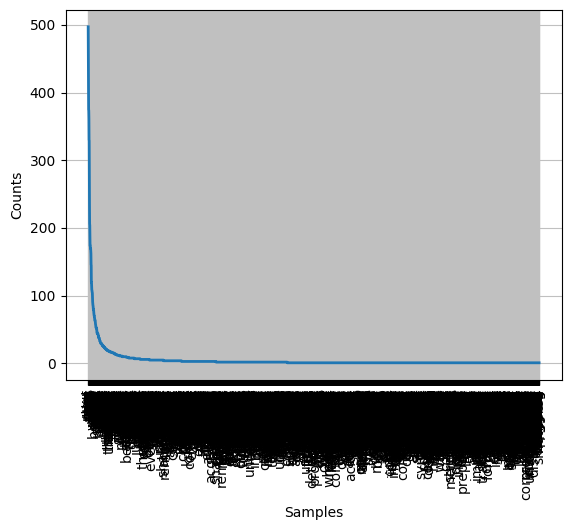

In [28]:
nlp.plot()

In [29]:
TFIDF = []

for doc in sonnets_corpus:
    current = {}
    for token in doc:
        current[token] = nlp.tf_idf(token, doc)
    
    TFIDF.append(current)

In [30]:
TFIDF

[{'sonnets': 0.20776660118039825,
  'by': 0.04126624111056583,
  'william': 0.12038680488924541,
  'shakespeare': 0.31164990177059737,
  'edited': 0.12038680488924541,
  'barbara': 0.12038680488924541,
  'a': 0.010739895699052779,
  'mowat': 0.12038680488924541,
  'and': 0.0018555223111135098,
  'paul': 0.12038680488924541,
  'werstine': 0.12038680488924541,
  'with': 0.010268404572953261,
  'michael': 0.12038680488924541,
  'poston': 0.12038680488924541,
  'rebecca': 0.12038680488924541,
  'niles': 0.12038680488924541,
  'folger': 0.24077360977849083,
  'library': 0.12038680488924541,
  'https': 0.12038680488924541,
  '://': 0.12038680488924541,
  'edu': 0.12038680488924541,
  'shakespeares': 0.24077360977849083,
  'works': 0.08737979629115279,
  'created': 0.09422936944476663,
  'on': 0.022902410550623985,
  'jul': 0.12038680488924541,
  '31': 0.12038680488924541,
  '2015': 0.12038680488924541,
  'from': 0.021740739975161318,
  'fdt': 0.12038680488924541,
  'version': 0.1203868048892

**Q1.7. Using nltk.util's ngrams module, find the 4-grams of the sonnetsvariable.**

In [31]:
from nltk.util import ngrams
def get_ngrams(text, length):
    n_grams = ngrams(tokenize(text), length)
    return [' '.join(grams) for grams in n_grams]

In [32]:
get_ngrams(sonnets.lower(), 4)

['sonnets by william shakespeare',
 'by william shakespeare edited',
 'william shakespeare edited by',
 'shakespeare edited by barbara',
 'edited by barbara a',
 'by barbara a mowat',
 'barbara a mowat and',
 'a mowat and paul',
 'mowat and paul werstine',
 'and paul werstine with',
 'paul werstine with michael',
 'werstine with michael poston',
 'with michael poston and',
 'michael poston and rebecca',
 'poston and rebecca niles',
 'and rebecca niles folger',
 'rebecca niles folger shakespeare',
 'niles folger shakespeare library',
 'folger shakespeare library https',
 'shakespeare library https ://',
 'library https :// shakespeare',
 'https :// shakespeare folger',
 ':// shakespeare folger edu',
 'shakespeare folger edu shakespeares',
 'folger edu shakespeares works',
 'edu shakespeares works shakespeares',
 'shakespeares works shakespeares sonnets',
 'works shakespeares sonnets created',
 'shakespeares sonnets created on',
 'sonnets created on jul',
 'created on jul 31',
 'on jul 3

<div class="alert alert-block alert-info">

# Part 2: Reflection
    
</div>

As a second step—after answering the questions, include the following:
1. A reflection of your experience performing the activity. 
2. A reflection on the importance of learning this activity.

**Note:** include your reflection in this notebook as markdown cells. 

**Answer:**

1. I am new to Natural Language Processing and Text Analysis, and this was my first time working with these topics. However, having studied Machine Learning last semester and gained experience with ML-related projects, I found this lab less challenging than expected. The theoretical concepts were engaging, and the lab example helped deepen my understanding. The lecture slides and lab materials were well-structured, and after reviewing them following the lecture, everything became clear. As a result, I found the lab activity manageable and straightforward to complete.
   
2. This activity is crucial for anyone working in Natural Language Processing (NLP) and Text Analysis because it introduces fundamental techniques for transforming text into a format that machines can process. Since computers only understand numbers, converting text into numerical representations is an essential step. Techniques like One-hot Encoding, Bag of Words, Stop Words removal, TF/IDF, and N-Grams help structure text data in ways that make it easier to analyze and extract meaning. Without proper text representation, even the best models may fail to produce meaningful results. Learning these methods ensures we can create good data representations, which are critical for building accurate and efficient NLP systems. This activity lays the foundation for more advanced tasks in NLP and emphasizes the importance of properly preparing data for analysis.

<div class="alert alert-block alert-info">

# Submission
    
</div>

Submit **Lab 1.ipynb** to the **Lab 1 - Text Representation (Dropbox)** on D2L by the due date. 

<div class="alert alert-block alert-info">

# Grading Rubric
    
</div>

|Criterion	|Excellent	|Good	|Average	|Below Average	|Poor	|No Attempt|
|:--	|:--	|:--	|:--	|:-- 	|:--	|:-- |
|**Part 1:** Activity-Question 1.1|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.2|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.3|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.4|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.5|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.6|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.7|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 2:** Reflection|**10 points**- Reflection clearly ties to the module content; experience and importance clearly laid out|**8 points**- Reflection mostly ties to the module content; experience & importance are discussed|**6 points**- Reflection ties minimally to the module content; experience & importance are discussed but not thoroughly|**4 points**- Reflection does not tie to the module content; experience & importance are minimally discussed|**2 points**- Minimal effort to tie to content; minimal effort to describe experience/ importance|**0 points**- Did not complete the reflection